In [2]:
!pip install seaborn

In [3]:
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import seaborn as sns

%matplotlib inline

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/yairl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data_source_url = "lesson8-sentiment/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [6]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

<Axes: ylabel='count'>

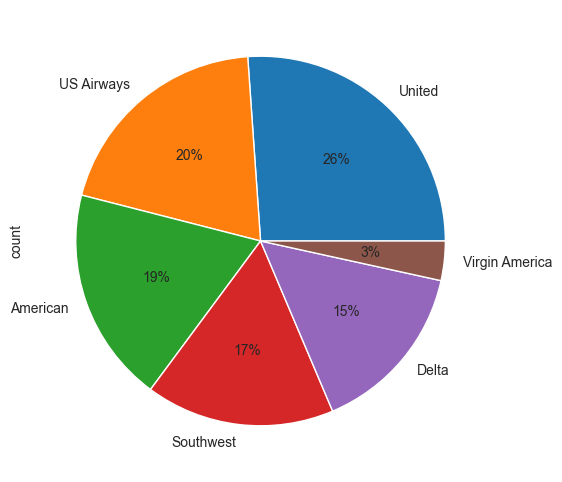

In [8]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

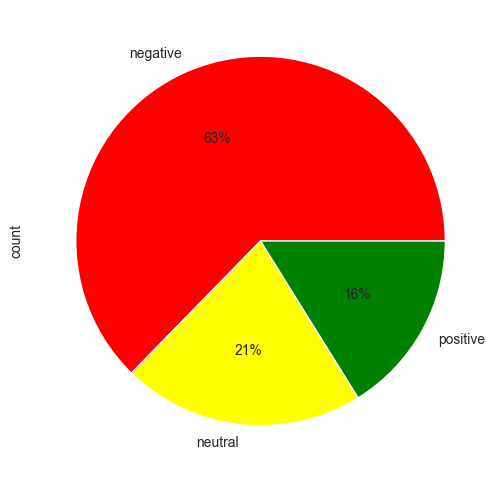

In [9]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<Axes: xlabel='airline'>

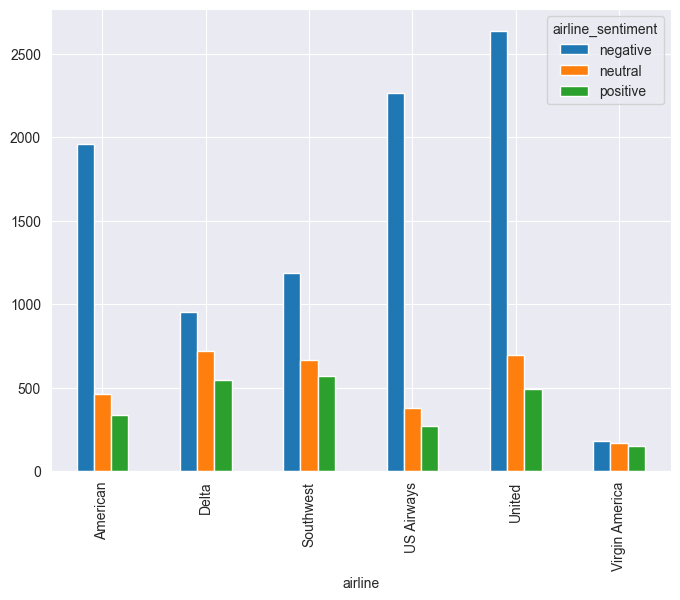

In [10]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

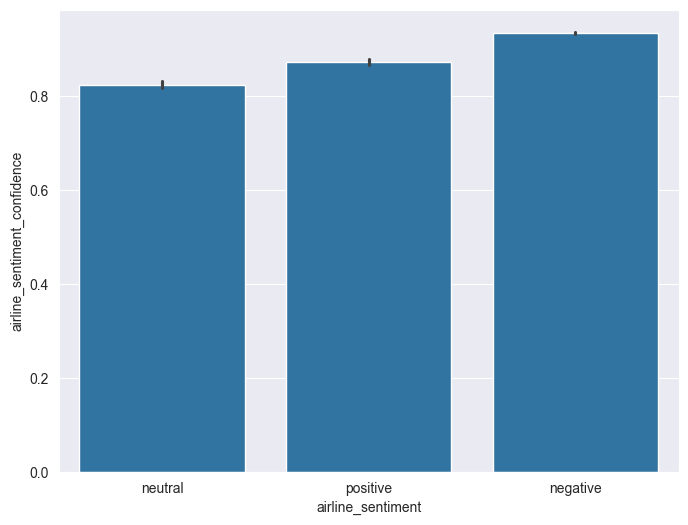

In [11]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [12]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

### Tweets cleanup

In [13]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

### Parameter Explanations:

* max_features=2500</br>
    Limits the maximum number of features (words) to 2500.
    This helps reduce the dimensionality of the data and improve the performance of the model by focusing on the most relevant words.
* min_df=7</br>
    Ignores words that appear in fewer than 7 documents.
    This helps eliminate rare words that may not contribute significantly to sentiment analysis, thereby reducing noise in the data.
* max_df=0.8</br>
    Ignores words that appear in more than 80% of the documents.
    This helps remove overly common words (such as "the", "is") that do not add meaningful value to the analysis.
* stop_words=stopwords.words('english')</br>
    Uses the English stop words list from the NLTK library.
    This removes common words that are not significant for sentiment analysis, enhancing the focus on more meaningful terms.

In [14]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [16]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [17]:
predictions = text_classifier.predict(X_test)

In [18]:
confusion_matrix(y_test,predictions)

array([[1726,  104,   40],
       [ 326,  247,   41],
       [ 132,   59,  253]])

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



In [20]:
print(f'{accuracy_score(y_test, predictions):.2f}')

0.76
